In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
df = pd.read_csv('StudentFeedback_final.csv')

In [4]:
# Display the first few rows to understand the structure
df.head()

,Gender,Age,12th marks %,rural/ urban area,Why take this course?,Which teaching methods helped your learning?,Were you prepared to take this course based on prior coursework?,How much time did you spend weekly on this course outside of class for C01?,How much time did you spend weekly on this course outside of class for C02?,How much time did you spend weekly on this course outside of class for C03?,...,Explain briefly your rationale for you choice to the previous question,Would more faculty concern improve your learning in C01?,Would more faculty concern improve your learning in C02?,Would more faculty concern improve your learning in C03?,Would more faculty concern improve your learning in C04?,Would more outside help improve your learning in C01?,Would more outside help improve your learning in C02?,Would more outside help improve your learning in C03?,Would more outside help improve your learning in C04?,Your overall feedback
0,1.0,0.333333,0.350515,1.0,0.388889,0.608333,1.0,0.250,0.250,0.222222,...,0.059908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,1.000000,0.340206,1.0,0.305556,0.516667,0.0,0.375,0.500,0.666667,...,0.147465,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.333333
2,1.0,0.666667,0.123711,0.0,0.527778,0.383333,1.0,0.500,0.500,0.555556,...,0.525346,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
3,0.0,0.666667,0.268041,1.0,0.083333,0.316667,1.0,0.125,0.125,0.222222,...,0.695853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1.0,0.333333,0.216495,1.0,0.722222,0.600000,0.0,0.125,0.125,0.111111,...,0.847926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [5]:
# Convert gender to numerical values (0 and 1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female -> 0, Male -> 1

# Select columns relevant for satisfaction and time spent analysis
satisfaction_columns = ['How satisfied are you with C01?', 'How satisfied are you with C02?', 
                        'How satisfied are you with C03?', 'How satisfied are you with C04?']
effort_columns = ['How much time did you spend weekly on this course outside of class for C01?', 
                  'How much time did you spend weekly on this course outside of class for C02?', 
                  'How much time did you spend weekly on this course outside of class for C03?', 
                  'How much time did you spend weekly on this course outside of class for C04?']

# Compute average satisfaction and effort across courses
df['Avg_Satisfaction'] = df[satisfaction_columns].mean(axis=1)
df['Avg_Effort'] = df[effort_columns].mean(axis=1)


In [6]:
# Drop the original columns after aggregation
df = df[['Gender', 'Avg_Satisfaction', 'Avg_Effort']]
print(df.head())

   Gender  Avg_Satisfaction  Avg_Effort
0       1          0.326190    0.236111
1       0          0.190476    0.579861
2       1          0.163095    0.527778
3       0          0.190476    0.173611
4       1          0.326190    0.118056


In [7]:
# Separate features and target
X = df[['Gender', 'Avg_Effort']]
y = df['Avg_Satisfaction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=8)

Epoch 1/50


/Users/kashishvarmaa/Documents/5 Sem/DL/Bias_Mitigation/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3409 - mae: 0.5143 - val_loss: 0.0862 - val_mae: 0.2408
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1185 - mae: 0.2770 - val_loss: 0.0319 - val_mae: 0.1400
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0545 - mae: 0.1885 - val_loss: 0.0255 - val_mae: 0.1369
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0375 - mae: 0.1610 - val_loss: 0.0253 - val_mae: 0.1425
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0408 - mae: 0.1668 - val_loss: 0.0257 - val_mae: 0.1449
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0333 - mae: 0.1564 - val_loss: 0.0259 - val_mae: 0.1459
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0310 - mae: 0.1491 - val_loss: 0.0262 - val_mae: 0.1463
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0265 - mae: 0.1404 - val_loss: 0.0270 - val_mae: 0.1478
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0299 - mae: 0.1406 - va

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274 - mae: 0.1515  
Test MAE: 0.150040403008461


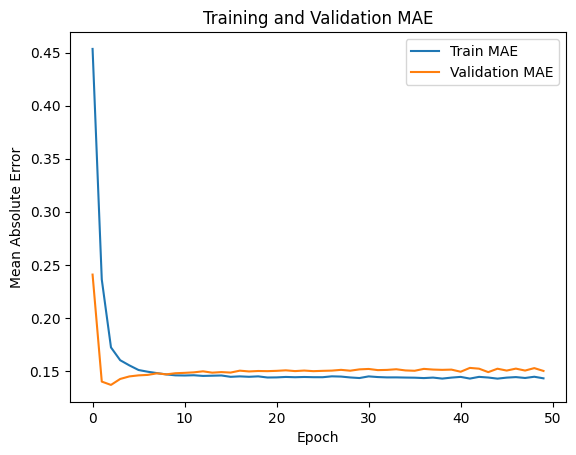

In [9]:
# Evaluate on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

# Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

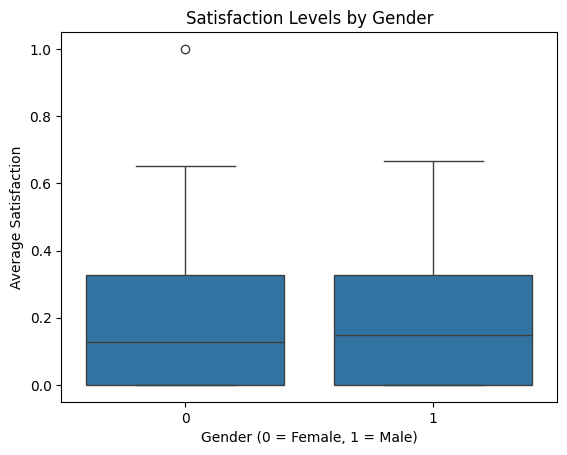

T-test for satisfaction levels by gender: T-stat = 0.06116153319163367, p-value = 0.9512732823786381


In [10]:
# Compare the satisfaction levels by gender
sns.boxplot(x='Gender', y='Avg_Satisfaction', data=df)
plt.title('Satisfaction Levels by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Average Satisfaction')
plt.show()

# Additional statistical test for significance
from scipy.stats import ttest_ind
female_satisfaction = df[df['Gender'] == 0]['Avg_Satisfaction']
male_satisfaction = df[df['Gender'] == 1]['Avg_Satisfaction']
t_stat, p_val = ttest_ind(female_satisfaction, male_satisfaction)
print(f"T-test for satisfaction levels by gender: T-stat = {t_stat}, p-value = {p_val}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


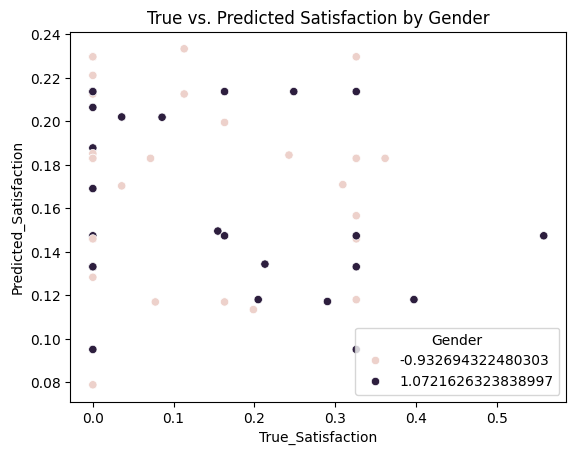

In [11]:
# Predict on the test set and compare predictions by gender
y_pred = model.predict(X_test).flatten()

# Compare actual vs. predicted satisfaction, highlighting any discrepancies across genders
result_df = pd.DataFrame({'Gender': X_test[:, 0], 'True_Satisfaction': y_test, 'Predicted_Satisfaction': y_pred})
sns.scatterplot(x='True_Satisfaction', y='Predicted_Satisfaction', hue='Gender', data=result_df)
plt.title('True vs. Predicted Satisfaction by Gender')
plt.show()